In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn 
sns.set()

In [2]:
raw_data = pd.read_excel("CoffeeShop.xlsx",'orders')
def is_valid_item_id(item_id):
    return bool(re.match(r'^It0(0[1-9]|1[0-9]|2[0-4])$', item_id))

# Apply the function to filter valid item ids range(It001 to It024)
data = raw_data[raw_data['item_id'].apply(is_valid_item_id)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   row_id      466 non-null    int64         
 1   order_id    466 non-null    object        
 2   created_at  466 non-null    datetime64[ns]
 3   item_id     466 non-null    object        
 4   quantity    466 non-null    int64         
 5   cust_name   466 non-null    object        
 6   in_or_out   434 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 29.1+ KB


In [3]:
price_data = pd.read_excel("CoffeeShop.xlsx", 'items')
merged_data = pd.merge(price_data, data,on='item_id')
merged_data


,item_id,sku,item_name,item_cat,item_size,item_price,row_id,order_id,created_at,quantity,cust_name,in_or_out
0,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,£ 3.45,6,ORD006,2024-02-12 07:28:00,1,Morgan,in
1,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,£ 3.45,24,ORD017,2024-02-12 08:22:00,1,Harper,in
2,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,£ 3.45,37,ORD028,2024-02-12 09:14:00,1,Morgan,in
3,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,£ 3.45,77,ORD058,2024-02-12 13:05:00,1,Alex,out
4,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,£ 3.45,98,ORD070,2024-02-12 13:35:00,1,Peyton,in
...,...,...,...,...,...,...,...,...,...,...,...,...
461,It024,SNK-SSM,Sandwich Salami&Mozzarella,Snacks,NaN,£ 5.50,406,ORD341,2024-02-16 14:03:00,1,Amelia,
462,It024,SNK-SSM,Sandwich Salami&Mozzarella,Snacks,NaN,£ 5.50,443,ORD373,2024-02-17 08:10:00,1,Finn,out
463,It024,SNK-SSM,Sandwich Salami&Mozzarella,Snacks,NaN,£ 5.50,469,ORD393,2024-02-17 09:52:00,1,Zed,
464,It024,SNK-SSM,Sandwich Salami&Mozzarella,Snacks,NaN,£ 5.50,472,ORD395,2024-02-17 10:24:00,1,Alex,in


In [4]:
req_data = merged_data[["order_id","item_id"," item_price ","cust_name"]]
req_data[' item_price '] = req_data[' item_price '].replace({'£': ''}, regex=True).astype(float)
req_data

C:\Users\Sakshi Srivastava\AppData\Local\Temp\ipykernel_7124\4057948931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data[' item_price '] = req_data[' item_price '].replace({'£': ''}, regex=True).astype(float)


,order_id,item_id,item_price,cust_name
0,ORD006,It001,3.45,Morgan
1,ORD017,It001,3.45,Harper
2,ORD028,It001,3.45,Morgan
3,ORD058,It001,3.45,Alex
4,ORD070,It001,3.45,Peyton
...,...,...,...,...
461,ORD341,It024,5.50,Amelia
462,ORD373,It024,5.50,Finn
463,ORD393,It024,5.50,Zed
464,ORD395,It024,5.50,Alex


In [5]:
aggregated_data = req_data.groupby(['order_id', 'cust_name']).agg({' item_price ': 'sum'}).reset_index()
# filtered_data = aggregated_data[aggregated_data['cust_name'] == 'Alex']
# filtered_data
aggregated_data


,order_id,cust_name,item_price
0,ORD001,Alex,2.15
1,ORD002,Jordan,4.60
2,ORD003,Taylor,2.15
3,ORD004,Casey,3.25
4,ORD005,Jamie,5.50
...,...,...,...
386,ORD432,Fred,4.00
387,ORD433,Gina,5.60
388,ORD434,Hugh,4.20
389,ORD435,Iris,4.60


In [6]:
customer_data = aggregated_data.groupby('cust_name').agg({
    'order_id': 'count',       # Number of orders
    ' item_price ': 'sum'        # Total spending
}).reset_index()

customer_data['avg']= customer_data[' item_price ']/ customer_data['order_id']
customer_data

,cust_name,order_id,item_price,avg
0,Alex,19,81.95,4.313158
1,Alice,2,8.15,4.075000
2,Amelia,2,13.55,6.775000
3,Amy,3,15.20,5.066667
4,Anna,2,7.20,3.600000
...,...,...,...,...
134,Yara,3,11.20,3.733333
135,Yol,1,3.45,3.450000
136,Zack,4,15.05,3.762500
137,Zed,1,9.25,9.250000


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['order_id', 'avg']])

scaled_features

array([[ 4.09761978, -0.25577011],
       [-0.20579157, -0.42191842],
       [-0.20579157,  1.46170777],
       [ 0.04735027,  0.26990725],
       [-0.20579157, -0.7532971 ],
       [ 0.04735027,  1.31636624],
       [-0.45893342, -0.78817907],
       [-0.45893342, -0.05565777],
       [-0.20579157,  0.46757172],
       [ 0.04735027, -0.74166978],
       [ 2.32562687, -0.24460176],
       [ 2.07248503,  0.38195235],
       [-0.45893342, -0.857943  ],
       [-0.45893342, -1.76487413],
       [-0.45893342, -0.3347135 ],
       [ 3.33819425, -0.16902416],
       [-0.45893342, -0.05565777],
       [-0.20579157,  0.60709959],
       [-0.45893342, -0.3347135 ],
       [ 1.81934318,  0.01061796],
       [-0.20579157, -0.63121022],
       [-0.45893342,  2.63025364],
       [-0.45893342,  0.85127335],
       [-0.45893342, -1.0672348 ],
       [-0.45893342, -0.47424137],
       [ 0.04735027,  0.30478921],
       [-0.45893342,  0.01410616],
       [-0.45893342,  0.01410616],
       [-0.45893342,

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'Within-cluster Sum of Squares')

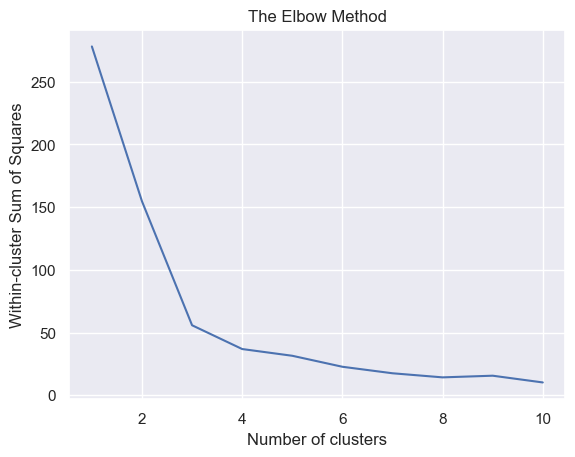

In [8]:
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans=KMeans(i)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [9]:
kmeans = KMeans(4)
kmeans.fit(scaled_features)
customer_data['Clusters']= kmeans.fit_predict(scaled_features)
customer_data

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,cust_name,order_id,item_price,avg,Clusters
0,Alex,19,81.95,4.313158,1
1,Alice,2,8.15,4.075000,0
2,Amelia,2,13.55,6.775000,2
3,Amy,3,15.20,5.066667,3
4,Anna,2,7.20,3.600000,0
...,...,...,...,...,...
134,Yara,3,11.20,3.733333,0
135,Yol,1,3.45,3.450000,0
136,Zack,4,15.05,3.762500,0
137,Zed,1,9.25,9.250000,2


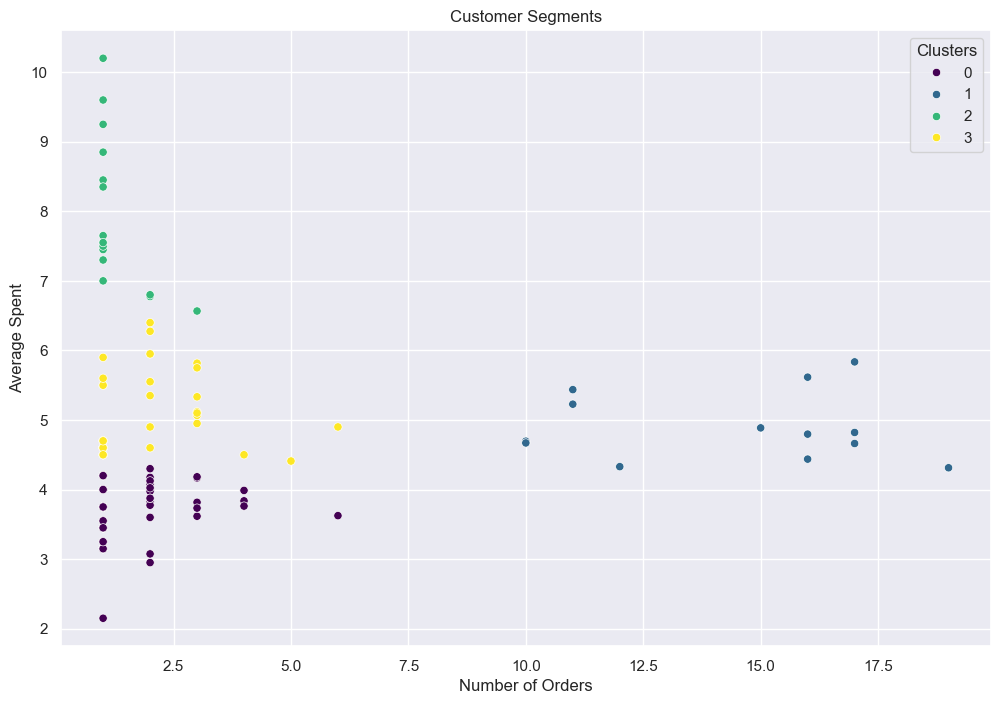

In [10]:
customer_data[['order_id','avg']]= scaler.inverse_transform(scaled_features)


# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_data, x='order_id', y='avg', hue='Clusters', palette='viridis')
# plt.scatter(customer_data['order_id'], customer_data['avg'], c=customer_data['Clusters'], cmap = 'viridis')

plt.xlabel("Number of Orders")
plt.ylabel("Average Spent")
plt.title("Customer Segments")
plt.show()